In [2]:
import sys;sys.path.append("../")
from painter import *
from painter.networks.blocks import PixelShuffle_ICNR
from painter.networks.partialUnet import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
x=torch.randn(1,32,32,32)

In [23]:
layer_ps = PixelShuffle_ICNR(ni=32,nf=32,scale=3)

In [24]:
layer_ps(x).shape

torch.Size([1, 32, 96, 96])

In [32]:
net = PartialConvUNet()

In [31]:
size = (1, 3, 256, 256)
inp = torch.ones(size)
input_mask = torch.ones(size)
input_mask[:, :, 100:, :][:, :, :, 100:] = 0



In [34]:
conv = PartialConvUNet()
l1 = nn.L1Loss()
inp.requires_grad = True



In [35]:
output,mask=conv(inp,input_mask)

In [36]:
print(output.shape)

torch.Size([1, 3, 256, 256])


In [37]:
print(output.shape)

torch.Size([1, 3, 256, 256])


In [8]:

loss = l1(output, torch.randn(1, 3, 256,256))
loss.backward()

assert (torch.sum(inp.grad != inp.grad).item() == 0)
assert (torch.sum(torch.isnan(conv.decoder1.conv.input_conv.weight)).item() == 0)
assert (torch.sum(torch.isnan(conv.decoder4.conv.input_conv.weight)).item() == 0)

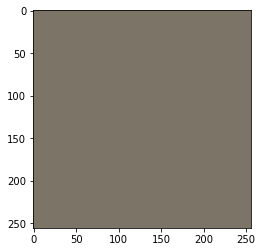

In [14]:
from painter.utils import *
plt.imshow(im_convert(output.squeeze(0),denormalize=True))

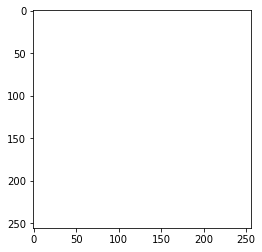

In [16]:
from painter.utils import *
plt.imshow(im_convert(mask.squeeze(0),denormalize=False))

In [63]:
from painter.losses import PartialConvFeatureLoss

In [64]:
loss = PartialConvFeatureLoss()

In [65]:
inp.shape

torch.Size([1, 3, 256, 256])

In [67]:
loss(inp,mask,output,torch.randn(1, 3, 256,256))

tensor(3.1998, grad_fn=<AddBackward0>)